<a href="https://colab.research.google.com/github/Mankiratbedi/PR-1/blob/main/bigbazarsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
# 1. Load Data
data = pd.read_csv("Bigbazaar_sales_data.csv")

In [4]:
# Preview dataset
print("Columns:", data.columns)
print(data.head())

Columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Year',
       'Outlet_Identifier', 'Item_Type', 'Item_MRP', 'MRP_Level',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Converted Sales'],
      dtype='object')
  Item_Identifier  Item_Weight  Item_Visibility  Year Outlet_Identifier  \
0           FDA15         9.30         0.016047    17            OUT049   
1           DRC01         5.92         0.019278     7            OUT018   
2           FDN15        17.50         0.016760    17            OUT049   
3           FDX07        19.20         0.022930    18            OUT010   
4           NCD19         8.93         0.014670    29            OUT013   

               Item_Type  Item_MRP  MRP_Level  Outlet_Size  \
0                  Dairy  249.8092  Very_High            2   
1            Soft Drinks   48.2692        Low            2   
2                   Meat  141.6180       High            2   
3  Fruits and Vegetables  1

In [5]:
# 2. Data Cleaning
data.drop_duplicates(inplace=True)
data.fillna(data.mean(numeric_only=True), inplace=True)

In [9]:
# Choose features
features = ["Item_MRP", "Item_Visibility", "Item_Outlet_Sales"]
X = data[features]

In [10]:
# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
print("\n--- K-Means Clustering ---")


--- K-Means Clustering ---


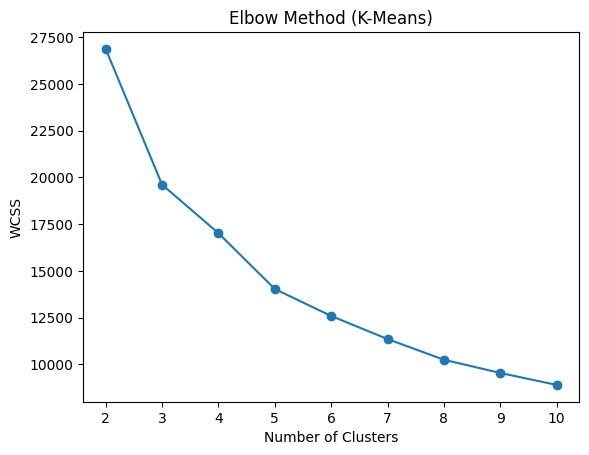

In [12]:
# Elbow method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method (K-Means)")
plt.show()

In [13]:
# Fit KMeans (choose k=4 as example)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
data["KMeans_Cluster"] = y_kmeans

In [14]:
# Evaluation
print("Silhouette Score (KMeans):", silhouette_score(X_scaled, y_kmeans))
print("Davies-Bouldin Score (KMeans):", davies_bouldin_score(X_scaled, y_kmeans))

Silhouette Score (KMeans): 0.3149897251152279
Davies-Bouldin Score (KMeans): 1.1595820891056623


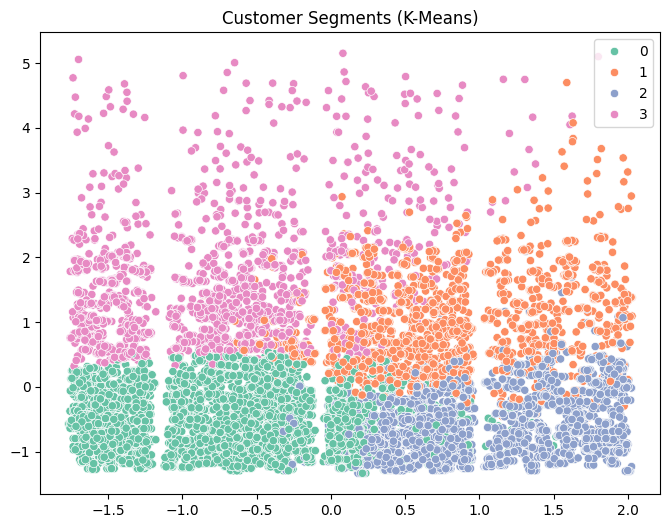

In [15]:
# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_kmeans, palette="Set2")
plt.title("Customer Segments (K-Means)")
plt.show()

In [16]:
print("\n--- DBSCAN Clustering ---")


--- DBSCAN Clustering ---


In [17]:
dbscan = DBSCAN(eps=0.8, min_samples=5)  # tune eps & min_samples
y_dbscan = dbscan.fit_predict(X_scaled)
data["DBSCAN_Cluster"] = y_dbscan

In [18]:
# Evaluation (ignore noise = -1)
labels = y_dbscan[y_dbscan != -1]
features_eval = X_scaled[y_dbscan != -1]

if len(set(labels)) > 1:
    print("Silhouette Score (DBSCAN):", silhouette_score(features_eval, labels))
    print("Davies-Bouldin Score (DBSCAN):", davies_bouldin_score(features_eval, labels))
else:
    print("DBSCAN found too few clusters to evaluate.")

DBSCAN found too few clusters to evaluate.


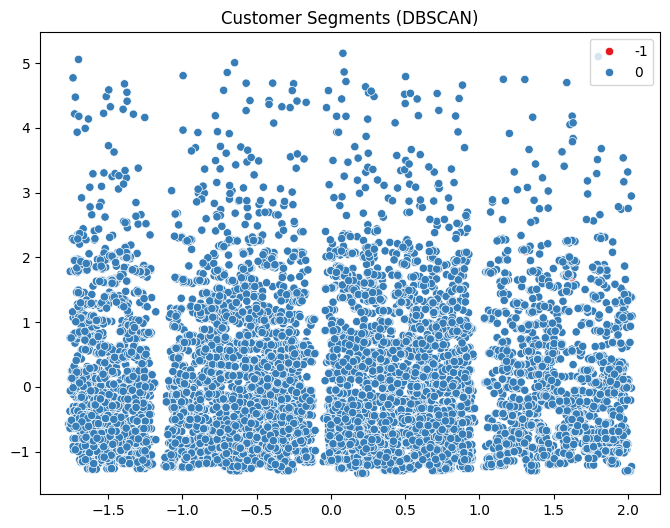

In [19]:
# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_dbscan, palette="Set1")
plt.title("Customer Segments (DBSCAN)")
plt.show()

In [20]:
print("\nKMeans Cluster Profiles:")
print(data.groupby("KMeans_Cluster")[features].mean())

print("\nDBSCAN Cluster Profiles:")
print(data.groupby("DBSCAN_Cluster")[features].mean())


KMeans Cluster Profiles:
                  Item_MRP  Item_Visibility  Item_Outlet_Sales
KMeans_Cluster                                                
0               100.709977         0.043603        1365.451000
1               186.525715         0.115304        2628.805728
2               201.201368         0.043545        3857.033508
3                92.842532         0.144835         916.930175

DBSCAN Cluster Profiles:
                  Item_MRP  Item_Visibility  Item_Outlet_Sales
DBSCAN_Cluster                                                
-1              239.209040         0.088824       10978.775680
 0              140.970396         0.070451        2178.485193


In [21]:
data.to_csv("segmented_customers_clusters.csv", index=False)